Pour permettre au banque de faire face au fraude nous allons mettre place un modèle capable de détecter les fraude par carte de credit

In [2]:
# Ouverture du dataset

import pandas as pd
import numpy as np

data =  pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Nous allons supprimer la colonne "CustomerID" car elle ne nous sert pas

In [3]:
df = data.drop(["CustomerID"], axis=1)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [5]:
# Connaitre la taille du dataset
df.shape

(200, 4)

In [6]:
# vérifions si il y a des valeurs manquantes 
df.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

il n'y a pas de valeurs manquantes dans le dataset

In [7]:
# Encodage de la variable qualitative
df_copy = df
df_quali =  df_copy.select_dtypes(object)
df_quali

,Gender
0,Male
1,Male
2,Female
3,Female
4,Female
...,...
195,Female
196,Female
197,Male
198,Male


In [8]:
# listes des variables qualitatives et quantitatives 
df_quali = ["Gender"]
df_quanti = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]

In [9]:
# fonction pour encoder la variable qualitative
def encod_var_qualitative(df_copy):
    df_copy['Gender'].replace({'Male': 0, 'Female': 1}, inplace=True)
    return df_copy

In [10]:
data_encoded = encod_var_qualitative(df_copy)
data_encoded

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


Notre dataset ne contient plus de variables qualitative car dans Gender la valeur Male equivaut à 0 et Female à 1. l'intégrité des données a été vérifié

Nous allons maintenant commencé la visualisation des données 

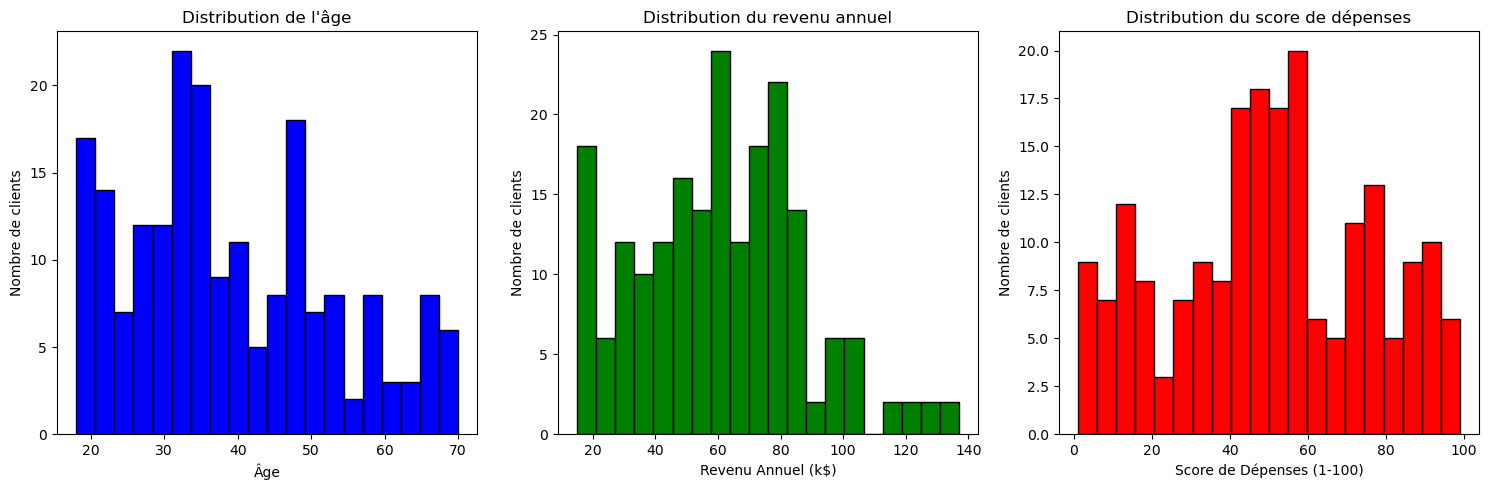

In [16]:
# Créez une figure avec trois sous-graphiques pour les caractéristiques Age, Revenu Annuel et Score de Dépenses
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Histogramme de l'âge
axes[0].hist(data_encoded['Age'], bins=20, color='blue', edgecolor='black')
axes[0].set_title('Distribution de l\'âge')
axes[0].set_xlabel('Âge')
axes[0].set_ylabel('Nombre de clients')

# Histogramme du revenu annuel
axes[1].hist(data_encoded['Annual Income (k$)'], bins=20, color='green', edgecolor='black')
axes[1].set_title('Distribution du revenu annuel')
axes[1].set_xlabel('Revenu Annuel (k$)')
axes[1].set_ylabel('Nombre de clients')

# Histogramme du score de dépenses
axes[2].hist(data_encoded['Spending Score (1-100)'], bins=20, color='red', edgecolor='black')
axes[2].set_title('Distribution du score de dépenses')
axes[2].set_xlabel('Score de Dépenses (1-100)')
axes[2].set_ylabel('Nombre de clients')

plt.tight_layout()
plt.show()


Au niveau de l'age nous pouvons dire qu'il y a une présence considérable de personne qui sont entre 18 et 50 ans 

Au niveau du revenu annuel nous avons un grand nombre de client qui touchent entre 10 et 20k puis il y a une dimunition au niveau des 30k mais à partir des 40 k il y a une hausse du nombre de client jusqu'a 90k  et un tres faible taux pour un revenu commençant à partir de 100k et ça baiss jusqu'a 120 pour stagner jusqu'a 140k

Au niveau du score de dépense nous pouvons observer qu'il y a un fort taux de client clients qui ont un score de dépense compris entre 40 et 60%

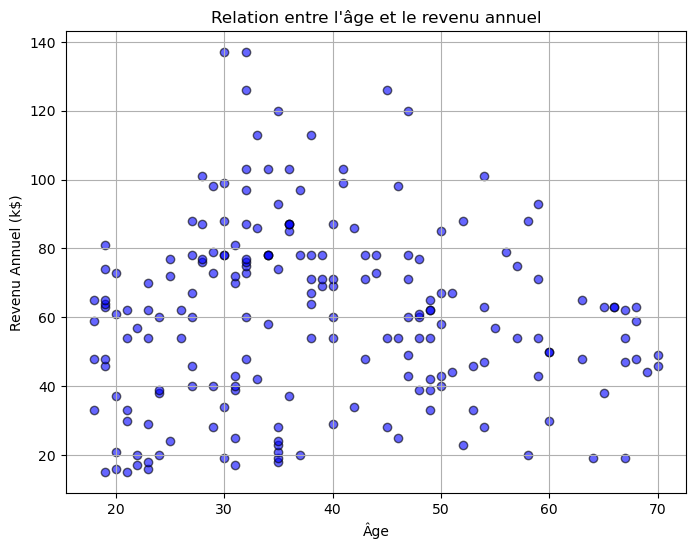

In [17]:
# Création des nuages de points pour montrer la rélation entre l'age des clients et leurs revenus annuels

# Extraire les données de l'âge et du revenu annuel
age = df_copy['Age']
annual_income = data_encoded['Annual Income (k$)']

# Créer un nuage de points
plt.figure(figsize=(8, 6))
plt.scatter(age, annual_income, c='b', marker='o', edgecolor='k', alpha=0.6)
plt.title('Relation entre l\'âge et le revenu annuel')
plt.xlabel('Âge')
plt.ylabel('Revenu Annuel (k$)')

plt.grid(True)
plt.show()


Les clients qui ont entre 18 et 40 ans ont un revenu annuel élévé par rapport qux clients plus agés

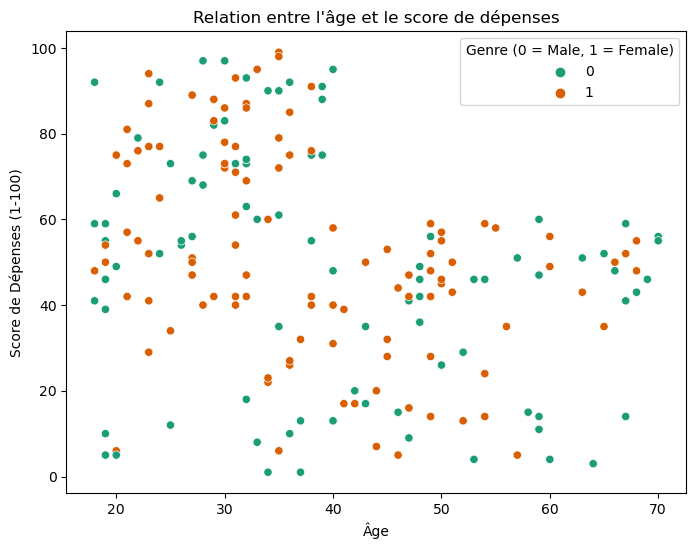

In [18]:
# Création des nuages de points pour montrer la rélation entre l'age des clients et leurs score de dépense

import matplotlib.pyplot as plt
import seaborn as sns



# Créez un nuage de points pour montrer la relation entre l'âge et le score de dépenses
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=data_encoded, hue='Gender', palette='Dark2')
plt.title('Relation entre l\'âge et le score de dépenses')
plt.xlabel('Âge')
plt.ylabel('Score de Dépenses (1-100)')
plt.legend(title='Genre (0 = Male, 1 = Female)', loc='upper right')
plt.show()



Nous pouvons ici voir que les clients qui ont un age compris entre 18 et 40 font un score de dépense éléve

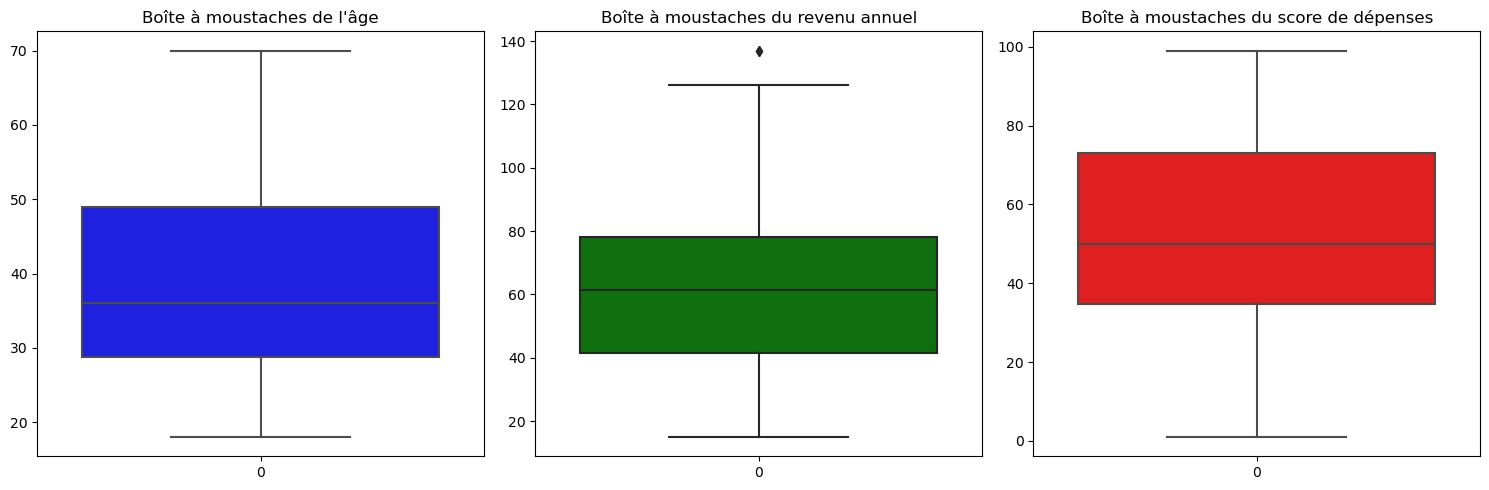

In [19]:
# Créez un ensemble de sous-graphiques pour les trois caractéristiques
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Boîte à moustaches pour l'âge
sns.boxplot(data_encoded['Age'], ax=axes[0], color='blue')
axes[0].set_title('Boîte à moustaches de l\'âge')

# Boîte à moustaches pour le revenu annuel
sns.boxplot(data_encoded['Annual Income (k$)'], ax=axes[1], color='green')
axes[1].set_title('Boîte à moustaches du revenu annuel')

# Boîte à moustaches pour le score de dépenses
sns.boxplot(data_encoded['Spending Score (1-100)'], ax=axes[2], color='red')
axes[2].set_title('Boîte à moustaches du score de dépenses')

plt.tight_layout()
plt.show()



Boite à moustaches de l'age :

  - 25% des clients moins agés ont au maximum 30 ans
  - 50% des clients moins agés ont au maximum 35 ans
  - 25% des clients plus agés ont au minimun 50 ans 
  - 25% des clients les plus agés restants ont au maximum 70 ans


Boite à moustaches du revenu annuel :

  - 25% des clients qui ont les revennus annuels les plus faible touchent au maximum  environ 40 k
  - 50% des clients qui ont les revennus annuels les plus faible touchent en maximum  environ 60 k
  - 25% des clients qui ont un revennus annuels les plus élévés touchent au minimum environ 80 k 
  - 25% des clients qui ont un revennus annuels les plus élévés touchent au maximum autour de 120 k sans prendre en comptes la valeurs abérrantes qui se rapproche des 140k par ans 


Boite à moustache du score de dépenses :

  - 25 % des clients qui ont un score de dépenses les plus faibles font un score max proche de 40 %
  - 50 % ds clients qui ont un score de dépenses les plus faibles font un score max proche de 50 %
  - 25 % des clients qui ont un score de dépenses les plus élévés font un score min proche de 70 %
  - 50 % des clients qui ont un score de dépenses les plus élévés font un score max proche de 100%

Nous allons appliquez le K-means à notre dataset pour pouvoir voir de nombre de clusters, creer des caractéristiques pertinentes qui peuvent aider à identifier les schémas de fraude 

In [46]:
data_encoded = data_encoded.drop(["Income_Spending_Ratio","Cluster" ], axis=1)

In [47]:
data_encoded

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


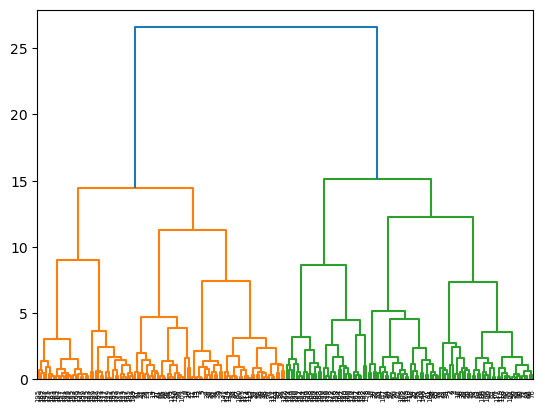

In [52]:
 # Utilisez le clustering hiérarchique pour identifier les regroupements inhérents

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Normalisation des données
scaler = StandardScaler()
scaled_df = scaler.fit_transform(data_encoded)

# Construction de la matrice de liaison (linkage matrix)
linkage_matrix = linkage(scaled_df, method='ward')

# Création du dendrogramme
dendrogram(linkage_matrix)
plt.show()

# Découpage dynamique du dendrogramme pour identifier les clusters
threshold = 4  # Choisissez un seuil de distance approprié
clusters = fcluster(linkage_matrix, t=threshold, criterion='distance')

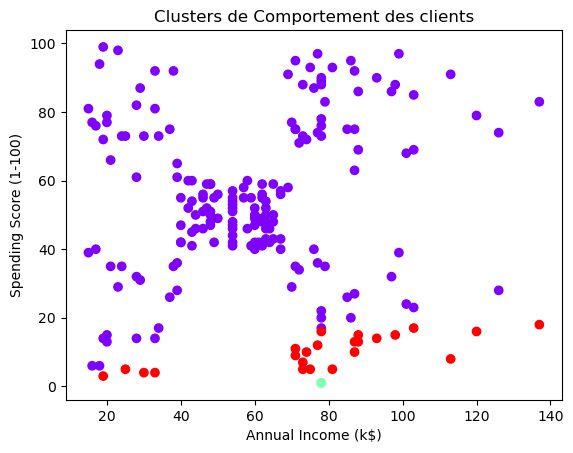

In [53]:

# Ajoutez les informations sur les clusters à vos données
data_encoded['Cluster'] = clusters

# Tracer un diagramme de dispersion 2D
plt.scatter(data_encoded['Annual Income (k$)'], data_encoded['Spending Score (1-100)'], c=df['Cluster'], cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters de Comportement des clients')
plt.show()

Nous remarquons trois différents groupe de clusters

c:\Users\BAUER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\BAUER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\BAUER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\BAUER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

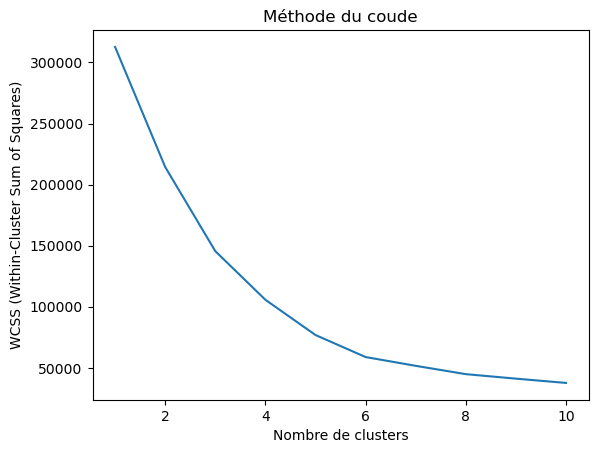

In [55]:
from sklearn.cluster import KMeans

# Utilisation de la méthode du coude pour trouver un bon nombre de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_encoded)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

c:\Users\BAUER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


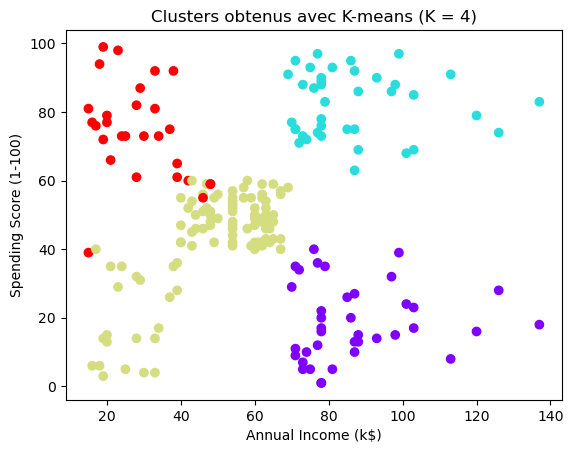

In [59]:
k = 4  # Remplacez par le nombre de clusters que vous avez choisi
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
data_encoded['Cluster'] = kmeans.fit_predict(data_encoded)

# Tracer un diagramme de dispersion 2D pour visualiser les clusters
plt.scatter(data_encoded['Annual Income (k$)'], data_encoded['Spending Score (1-100)'], c=data_encoded['Cluster'], cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters obtenus avec K-means (K = 4)')
plt.show()

Apres observation nous pouvons nous rendre compte qu'il ya plusieurs clients présent dans le cluster à couleur rouge qui ont un score de dépense élévé alors qu'ils touchent le moins de revenu annuel , nous pouvons affirmer que la plupart des fraudes sur la carte bancaire sont présent dans ce cluster